In [1]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import os


datadir='/content/drive/MyDrive/images'
category=['ShahRukhKhan','TOMCRUISE','WillSmith']
target=[]
images=[]
flatten_data=[]
img_size=500


In [2]:
for c in category:
    path=os.path.join(datadir,c)
    print(path)
    class_num=category.index(c)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_array=img_array/255
        new_img=resize(img_array,(img_size,img_size))
        flatten_data.append(new_img.flatten())
        images.append(new_img)
        target.append(class_num)
    

/content/drive/MyDrive/images/ShahRukhKhan
/content/drive/MyDrive/images/TOMCRUISE
/content/drive/MyDrive/images/WillSmith


In [3]:
flatten_data=np.array(flatten_data)
target=np.array(target)
images=np.array(images)

In [4]:
target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [5]:
flatten_data

array([[0.03499647, 0.17284667, 0.25098039, ..., 0.03147294, 0.14058706,
        0.17166902],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.85003529, 0.79513333, 0.54023137, ..., 0.90980392, 0.90588235,
        0.9372549 ],
       ...,
       [0.55686275, 0.50588235, 0.86666667, ..., 0.10205637, 0.12460294,
        0.24429902],
       [0.24313725, 0.19607843, 0.47843137, ..., 0.30196078, 0.23529412,
        0.51372549],
       [0.10196078, 0.07843137, 0.08627451, ..., 0.2267451 , 0.20321569,
        0.21105882]])

<BarContainer object of 3 artists>

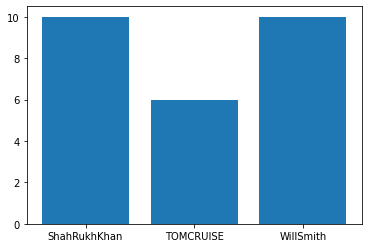

In [7]:
unique,count=np.unique(target,return_counts=True)
plt.bar(category,count)

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split=train_test_split(flatten_data,target,test_size=0.1)
  

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

In [10]:
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
y_pred=clf.predict(xtest)
y_pred

array([2, 0, 1])

In [12]:
ytest

array([2, 0, 2])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,ytest)

0.6666666666666666

In [14]:
confusion_matrix(y_pred,ytest)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [15]:
import pandas as pd

df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred}) 
df1

,Actual,Predicted
0,2,2
1,0,0
2,2,1


In [16]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [17]:
model=pickle.load(open('img_model.p','rb'))

enter urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBOTYjvrcmfUQ96lolF1grKZEKw_ait5guOA&usqp=CAU
predicted ouput:WillSmith


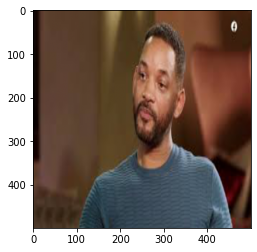

In [24]:
#test new image
flatten_data=[]
url=input('enter url')
img=imread(url)
img_resized=resize(img,(500,500))
flatten_data.append(img_resized.flatten())
flatten_data=np.array(flatten_data)
plt.imshow(img_resized)
y_out=model.predict(flatten_data)
y_out=category[y_out[0]]
print(f'predicted ouput:{y_out}')

enter urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfuQqD7teLB0z4x-WHCnJI8gVkinoQpfOUuA&usqp=CAU
predicted ouput:TOMCRUISE


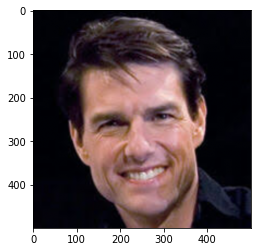

In [19]:

flatten_data=[]
url=input('enter url')
img=imread(url)
img_resized=resize(img,(500,500))
flatten_data.append(img_resized.flatten())
flatten_data=np.array(flatten_data)
plt.imshow(img_resized)
y_out=model.predict(flatten_data)
y_out=category[y_out[0]]
print(f'predicted ouput:{y_out}')

enter urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0Ssd2rE5jEvzcakxD56uSKIBhj_xx1AyAXA&usqp=CAU
predicted ouput:ShahRukhKhan


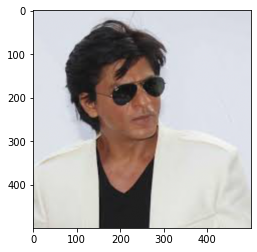

In [22]:
flatten_data=[]
url=input('enter url')
img=imread(url)
img_resized=resize(img,(500,500))
flatten_data.append(img_resized.flatten())
flatten_data=np.array(flatten_data)
plt.imshow(img_resized)
y_out=model.predict(flatten_data)
y_out=category[y_out[0]]
print(f'predicted ouput:{y_out}')